<a href="https://colab.research.google.com/github/ChristosBellos/MyMachineLearningRepository/blob/main/Basketball_Games_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**In my first project at Sports Analytics, I'm going to transform and analyze data I have gathered from Basketball-Reference website.**

**The data I have collected are some basic and advanced data, from all the Milwakee Bucks games during January of 2025 season.**

In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# read and store the csv file
df = pd.read_csv("combined.csv", sep=";", quotechar='"')

df.head(5)

,Starters;MP;FG;FGA;FG%;3P;3PA;3P%;FT;FTA;FT%;ORB;DRB;TRB;AST;STL;BLK;TOV;PF;PTS;GmSc;+/-;TS%;eFG%;3PAr;FTr;ORB%;DRB%;TRB%;AST%;STL%;BLK%;TOV%;USG%;ORtg;DRtg;BPM;Result
0,Damian Lillard;40:18:00;6;20;.300;4;13;.308;7;...
1,Giannis Antetokounmpo;37:06:00;12;24;.500;0;0;...
2,Khris Middleton;24:02:00;6;11;.545;0;3;.000;0;...
3,Brook Lopez;22:41;3;4;.750;0;1;.000;1;2;.500;1...
4,Andre Jackson Jr.;13:31;1;1;1.000;0;0;;0;0;;1;...


There was a mistake when combining different xls files and transforming them into csv files.

I will change the columns' separation with python code.

In [5]:
# read as a ONE-column file
raw = pd.read_csv("combined.csv", header=None)

# remove the surrounding quotes from the text
raw[0] = raw[0].str.strip('"')

# now split the text by semicolon into proper columns
df = raw[0].str.split(";", expand=True)

# Step 3: Make first row the header
df.columns = df.iloc[0]   # set row 0 as header
df = df[1:]               # remove row 0 from data

# Reset index
df = df.reset_index(drop=True)

# show first rows
df.head()


,Starters,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,...,TRB%,AST%,STL%,BLK%,TOV%,USG%,ORtg,DRtg,BPM,Result
0,Damian Lillard,40:18:00,6,20,.300,4,13,.308,7,8,...,3.7,25.4,1.2,0.0,11.3,27.2,106,119,-0.3,L
1,Giannis Antetokounmpo,37:06:00,12,24,.500,0,0,,3,10,...,17.3,37.0,1.3,7.9,9.6,34.9,102,106,6.7,L
2,Khris Middleton,24:02:00,6,11,.545,0,3,.000,0,0,...,6.2,14.3,2.0,0.0,0.0,18.9,119,114,1.7,L
3,Brook Lopez,22:41,3,4,.750,0,1,.000,1,2,...,6.5,6.3,0.0,4.3,17.0,10.7,125,118,-1.3,L
4,Andre Jackson Jr.,13:31,1,1,1.000,0,0,,0,0,...,7.3,0.0,0.0,0.0,50.0,6.1,101,121,-7.7,L


**Now the dataset with all the players' stats, for each game, during the month of January 2025, is how I want it to be.**

**I want to check how much and in what way some players affected the games' result in that period and use plots to create a visualization.**

In [6]:
# let's do some checks

# show stats of a player
df[df["Starters"] == "Giannis Antetokounmpo"].head(5)

,Starters,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,...,TRB%,AST%,STL%,BLK%,TOV%,USG%,ORtg,DRtg,BPM,Result
1,Giannis Antetokounmpo,37:06:00,12,24,.500,0,0,,3,10,...,17.3,37.0,1.3,7.9,9.6,34.9,102,106,6.7,L
12,Giannis Antetokounmpo,36:14:00,13,17,.765,0,0,,8,14,...,23.1,30.8,0.0,0.0,0.0,28.6,158,111,14.7,W
28,Giannis Antetokounmpo,31:56:00,10,18,.556,0,0,,5,10,...,17.2,19.4,0.0,11.0,4.3,30.9,119,91,6.8,W
45,Giannis Antetokounmpo,35:00:00,12,22,.545,0,1,.000,12,15,...,20.0,6.7,0.0,2.2,12.3,41.8,113,122,1.3,L
58,Giannis Antetokounmpo,36:37:00,16,23,.696,0,1,.000,3,10,...,25.6,29.6,2.6,0.0,6.8,36.5,125,97,9.9,W


In [7]:
for x in df.columns:
  print("Total not null values of ", x, ": ", df[x].isna().count())
  print("Total empty values of ", x, ": ", (df[x]=="").sum(), "\n")

Total not null values of  Starters :  229
Total empty values of  Starters :  48 

Total not null values of  MP :  229
Total empty values of  MP :  48 

Total not null values of  FG :  229
Total empty values of  FG :  48 

Total not null values of  FGA :  229
Total empty values of  FGA :  48 

Total not null values of  FG% :  229
Total empty values of  FG% :  64 

Total not null values of  3P :  229
Total empty values of  3P :  48 

Total not null values of  3PA :  229
Total empty values of  3PA :  48 

Total not null values of  3P% :  229
Total empty values of  3P% :  91 

Total not null values of  FT :  229
Total empty values of  FT :  48 

Total not null values of  FTA :  229
Total empty values of  FTA :  48 

Total not null values of  FT% :  229
Total empty values of  FT% :  157 

Total not null values of  ORB :  229
Total empty values of  ORB :  48 

Total not null values of  DRB :  229
Total empty values of  DRB :  48 

Total not null values of  TRB :  229
Total empty values of  T

**We can see that there are no null values in our dataset, but there are many empty values, including some empty rows.**

In [8]:
(df == "").all(axis=1).sum()

np.int64(48)

In [9]:
# update our dataset, excluding empty rows
df_clean = df[~(df == "").all(axis=1)]

# confirmation
(df_clean == "").all(axis=1).sum()

np.int64(0)

In [10]:
df_clean.head(5)

,Starters,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,...,TRB%,AST%,STL%,BLK%,TOV%,USG%,ORtg,DRtg,BPM,Result
0,Damian Lillard,40:18:00,6,20,.300,4,13,.308,7,8,...,3.7,25.4,1.2,0.0,11.3,27.2,106,119,-0.3,L
1,Giannis Antetokounmpo,37:06:00,12,24,.500,0,0,,3,10,...,17.3,37.0,1.3,7.9,9.6,34.9,102,106,6.7,L
2,Khris Middleton,24:02:00,6,11,.545,0,3,.000,0,0,...,6.2,14.3,2.0,0.0,0.0,18.9,119,114,1.7,L
3,Brook Lopez,22:41,3,4,.750,0,1,.000,1,2,...,6.5,6.3,0.0,4.3,17.0,10.7,125,118,-1.3,L
4,Andre Jackson Jr.,13:31,1,1,1.000,0,0,,0,0,...,7.3,0.0,0.0,0.0,50.0,6.1,101,121,-7.7,L


In [11]:
# There are no empty rows. Let's see how many empty cells are in each column
for x in df_clean.columns:
  print(x, " total empty values: ", (df_clean[x] == "").sum(), "\n")

Starters  total empty values:  0 

MP  total empty values:  0 

FG  total empty values:  0 

FGA  total empty values:  0 

FG%  total empty values:  16 

3P  total empty values:  0 

3PA  total empty values:  0 

3P%  total empty values:  43 

FT  total empty values:  0 

FTA  total empty values:  0 

FT%  total empty values:  109 

ORB  total empty values:  0 

DRB  total empty values:  0 

TRB  total empty values:  0 

AST  total empty values:  0 

STL  total empty values:  0 

BLK  total empty values:  0 

TOV  total empty values:  0 

PF  total empty values:  0 

PTS  total empty values:  0 

GmSc  total empty values:  0 

+/-  total empty values:  0 

TS%  total empty values:  15 

eFG%  total empty values:  16 

3PAr  total empty values:  16 

FTr  total empty values:  16 

ORB%  total empty values:  1 

DRB%  total empty values:  1 

TRB%  total empty values:  1 

AST%  total empty values:  1 

STL%  total empty values:  1 

BLK%  total empty values:  1 

TOV%  total empty value

In [12]:
# replace all the empty values with NaN
df_clean = df_clean.replace("", np.nan)

for x in df_clean.columns:
  print(x, " total empty values: ", (df_clean[x] == "").sum())

Starters  total empty values:  0
MP  total empty values:  0
FG  total empty values:  0
FGA  total empty values:  0
FG%  total empty values:  0
3P  total empty values:  0
3PA  total empty values:  0
3P%  total empty values:  0
FT  total empty values:  0
FTA  total empty values:  0
FT%  total empty values:  0
ORB  total empty values:  0
DRB  total empty values:  0
TRB  total empty values:  0
AST  total empty values:  0
STL  total empty values:  0
BLK  total empty values:  0
TOV  total empty values:  0
PF  total empty values:  0
PTS  total empty values:  0
GmSc  total empty values:  0
+/-  total empty values:  0
TS%  total empty values:  0
eFG%  total empty values:  0
3PAr  total empty values:  0
FTr  total empty values:  0
ORB%  total empty values:  0
DRB%  total empty values:  0
TRB%  total empty values:  0
AST%  total empty values:  0
STL%  total empty values:  0
BLK%  total empty values:  0
TOV%  total empty values:  0
USG%  total empty values:  0
ORtg  total empty values:  0
DRtg  to

**The data have been transformed into proper form for processing and analyzing.**

In [13]:
df_clean.head(5)

,Starters,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,...,TRB%,AST%,STL%,BLK%,TOV%,USG%,ORtg,DRtg,BPM,Result
0,Damian Lillard,40:18:00,6,20,.300,4,13,.308,7,8,...,3.7,25.4,1.2,0.0,11.3,27.2,106,119,-0.3,L
1,Giannis Antetokounmpo,37:06:00,12,24,.500,0,0,NaN,3,10,...,17.3,37.0,1.3,7.9,9.6,34.9,102,106,6.7,L
2,Khris Middleton,24:02:00,6,11,.545,0,3,.000,0,0,...,6.2,14.3,2.0,0.0,0.0,18.9,119,114,1.7,L
3,Brook Lopez,22:41,3,4,.750,0,1,.000,1,2,...,6.5,6.3,0.0,4.3,17.0,10.7,125,118,-1.3,L
4,Andre Jackson Jr.,13:31,1,1,1.000,0,0,NaN,0,0,...,7.3,0.0,0.0,0.0,50.0,6.1,101,121,-7.7,L


In [14]:
df.shape

(229, 38)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 38 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Starters  229 non-null    object
 1   MP        229 non-null    object
 2   FG        229 non-null    object
 3   FGA       229 non-null    object
 4   FG%       229 non-null    object
 5   3P        229 non-null    object
 6   3PA       229 non-null    object
 7   3P%       229 non-null    object
 8   FT        229 non-null    object
 9   FTA       229 non-null    object
 10  FT%       229 non-null    object
 11  ORB       229 non-null    object
 12  DRB       229 non-null    object
 13  TRB       229 non-null    object
 14  AST       229 non-null    object
 15  STL       229 non-null    object
 16  BLK       229 non-null    object
 17  TOV       229 non-null    object
 18  PF        229 non-null    object
 19  PTS       229 non-null    object
 20  GmSc      229 non-null    object
 21  +/-       229 no

**Because basketball stats have a unique representation, I will transform each arithmetic stat/number, that is represented as an object, into a float or integer value.**

In [16]:
df_clean["MP"].head(10)

,MP
0,40:18:00
1,37:06:00
2,24:02:00
3,22:41
4,13:31
5,28:11:00
6,21:02
7,18:41
8,18:16
9,9:33


In [17]:
# one-by-one change
# At first I thought to use df_clean["feature"].astype(type) command, but I
# saw that pd.to_numeric command is safer and handles errors better.
df_clean["FG"] = pd.to_numeric(df_clean["FG"], errors="coerce").astype(int)
df_clean["FGA"] = pd.to_numeric(df_clean["FGA"], errors="coerce").astype(int)
df_clean["FG%"] = pd.to_numeric(df_clean["FG%"], errors="coerce").astype(float)
df_clean["3P"] = pd.to_numeric(df_clean["3P"], errors="coerce").astype(int)
df_clean["3PA"] = pd.to_numeric(df_clean["3PA"], errors="coerce").astype(int)
df_clean["3P%"] = pd.to_numeric(df_clean["3P%"], errors="coerce").astype(float)
df_clean["FT"] = pd.to_numeric(df_clean["FT"], errors="coerce").astype(int)
df_clean["FTA"] = pd.to_numeric(df_clean["FTA"], errors="coerce").astype(int)
df_clean["FT%"] = pd.to_numeric(df_clean["FT%"], errors="coerce").astype(float)
df_clean["ORB"] = pd.to_numeric(df_clean["ORB"], errors="coerce").astype(int)
df_clean["DRB"] = pd.to_numeric(df_clean["DRB"], errors="coerce").astype(int)
df_clean["TRB"] = pd.to_numeric(df_clean["TRB"], errors="coerce").astype(int)
df_clean["AST"] = pd.to_numeric(df_clean["AST"], errors="coerce").astype(int)
df_clean["STL"] = pd.to_numeric(df_clean["STL"], errors="coerce").astype(int)
df_clean["BLK"] = pd.to_numeric(df_clean["BLK"], errors="coerce").astype(int)
df_clean["TOV"] = pd.to_numeric(df_clean["TOV"], errors="coerce").astype(int)
df_clean["PF"] = pd.to_numeric(df_clean["PF"], errors="coerce").astype(int)
df_clean["PTS"] = pd.to_numeric(df_clean["PTS"], errors="coerce").astype(int)
df_clean["GmSc"] = pd.to_numeric(df_clean["GmSc"], errors="coerce").astype(float)
df_clean["+/-"] = pd.to_numeric(df_clean["+/-"], errors="coerce").astype(int)

# for the special category of percentages being represented as .ddd, the commands
# will be:
df_clean["TS%"] = pd.to_numeric(df_clean["TS%"], errors="coerce").astype(float)
df_clean["TS%"] = df_clean["TS%"]*100

df_clean["eFG%"] = pd.to_numeric(df_clean["eFG%"], errors="coerce").astype(float)
df_clean["eFG%"] = df_clean["eFG%"]*100

df_clean["3PAr"] = pd.to_numeric(df_clean["3PAr"], errors="coerce").astype(float)
df_clean["3PAr"] = df_clean["3PAr"]*100

df_clean["FTr"] = pd.to_numeric(df_clean["FTr"], errors="coerce").astype(float)
df_clean["FTr"] = df_clean["FTr"]*100

# continue with the next percentage statlines
df_clean["ORB%"] = pd.to_numeric(df_clean["ORB%"], errors="coerce").astype(float)
df_clean["DRB%"] = pd.to_numeric(df_clean["DRB%"], errors="coerce").astype(float)
df_clean["TRB%"] = pd.to_numeric(df_clean["TRB%"], errors="coerce").astype(float)
df_clean["AST%"] = pd.to_numeric(df_clean["AST%"], errors="coerce").astype(float)
df_clean["STL%"] = pd.to_numeric(df_clean["STL%"], errors="coerce").astype(float)
df_clean["BLK%"] = pd.to_numeric(df_clean["BLK%"], errors="coerce").astype(float)
df_clean["TOV%"] = pd.to_numeric(df_clean["TOV%"], errors="coerce").astype(float)
df_clean["USG%"] = pd.to_numeric(df_clean["USG%"], errors="coerce").astype(float)
df_clean["BPM"] = pd.to_numeric(df_clean["BPM"], errors="coerce").astype(float)

# for "Minutes Played" feature transformation
# MP feature has two types of values, mm:ss and mm:ss:00. In order to transform
# both of these kind of values, we' re going to check first wether it has the
# first form or not.

In [18]:
df_clean["MP"].head(2)

,MP
0,40:18:00
1,37:06:00


In [19]:
df_clean["MP"] = df_clean["MP"].astype(str).str.strip()

def mp_to_minutes(x):
  if x=="" or x.lower() == "nan":
    return np.nan

  s = str(x).strip()
  parts = s.split(":")

  if len(parts)<2:
    return np.nan

  try:
    minutes = int(parts[0])
    seconds = int(parts[1])
    return minutes + seconds / 60
  except ValueError:
    return np.nan

df_clean["MP_new"] = df_clean["MP"].apply(mp_to_minutes)
df_clean["MP_new"].head(4)

,MP_new
0,40.300000
1,37.100000
2,24.033333
3,22.683333


In [20]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181 entries, 0 to 225
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Starters  181 non-null    object 
 1   MP        181 non-null    object 
 2   FG        181 non-null    int64  
 3   FGA       181 non-null    int64  
 4   FG%       165 non-null    float64
 5   3P        181 non-null    int64  
 6   3PA       181 non-null    int64  
 7   3P%       138 non-null    float64
 8   FT        181 non-null    int64  
 9   FTA       181 non-null    int64  
 10  FT%       72 non-null     float64
 11  ORB       181 non-null    int64  
 12  DRB       181 non-null    int64  
 13  TRB       181 non-null    int64  
 14  AST       181 non-null    int64  
 15  STL       181 non-null    int64  
 16  BLK       181 non-null    int64  
 17  TOV       181 non-null    int64  
 18  PF        181 non-null    int64  
 19  PTS       181 non-null    int64  
 20  GmSc      181 non-null    float64
 21

In [21]:
df_clean = df_clean.drop(columns=["MP"])
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181 entries, 0 to 225
Data columns (total 38 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Starters  181 non-null    object 
 1   FG        181 non-null    int64  
 2   FGA       181 non-null    int64  
 3   FG%       165 non-null    float64
 4   3P        181 non-null    int64  
 5   3PA       181 non-null    int64  
 6   3P%       138 non-null    float64
 7   FT        181 non-null    int64  
 8   FTA       181 non-null    int64  
 9   FT%       72 non-null     float64
 10  ORB       181 non-null    int64  
 11  DRB       181 non-null    int64  
 12  TRB       181 non-null    int64  
 13  AST       181 non-null    int64  
 14  STL       181 non-null    int64  
 15  BLK       181 non-null    int64  
 16  TOV       181 non-null    int64  
 17  PF        181 non-null    int64  
 18  PTS       181 non-null    int64  
 19  GmSc      181 non-null    float64
 20  +/-       181 non-null    int64  
 21

In [22]:
df_clean["ORtg"] = pd.to_numeric(df_clean["ORtg"], errors="coerce").astype("Int64")
df_clean["DRtg"] = pd.to_numeric(df_clean["DRtg"], errors="coerce").astype("Int64")

In [23]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181 entries, 0 to 225
Data columns (total 38 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Starters  181 non-null    object 
 1   FG        181 non-null    int64  
 2   FGA       181 non-null    int64  
 3   FG%       165 non-null    float64
 4   3P        181 non-null    int64  
 5   3PA       181 non-null    int64  
 6   3P%       138 non-null    float64
 7   FT        181 non-null    int64  
 8   FTA       181 non-null    int64  
 9   FT%       72 non-null     float64
 10  ORB       181 non-null    int64  
 11  DRB       181 non-null    int64  
 12  TRB       181 non-null    int64  
 13  AST       181 non-null    int64  
 14  STL       181 non-null    int64  
 15  BLK       181 non-null    int64  
 16  TOV       181 non-null    int64  
 17  PF        181 non-null    int64  
 18  PTS       181 non-null    int64  
 19  GmSc      181 non-null    float64
 20  +/-       181 non-null    int64  
 21

**Now that I have transformed data the way I want to, I will start with finding a connection between game results and players' performance.**

**1. How does playing time of the 4 starting players (Giannis, Middleton, Lillard and Lopez) and key bench player, Bobby Portis, affect the end result of the game.**

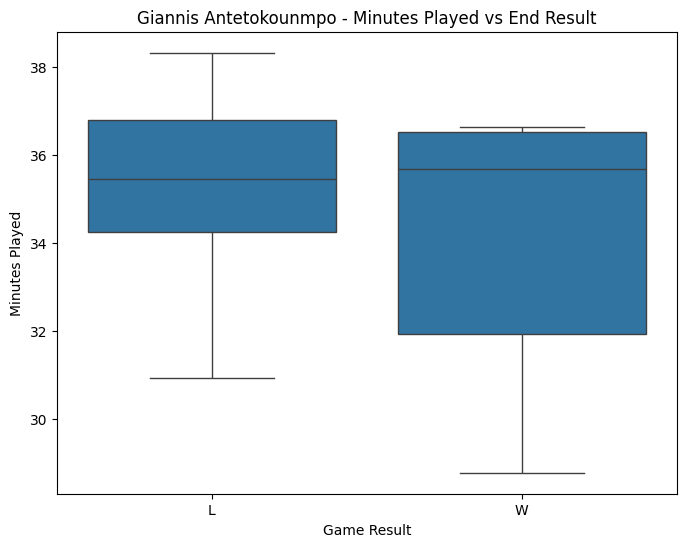

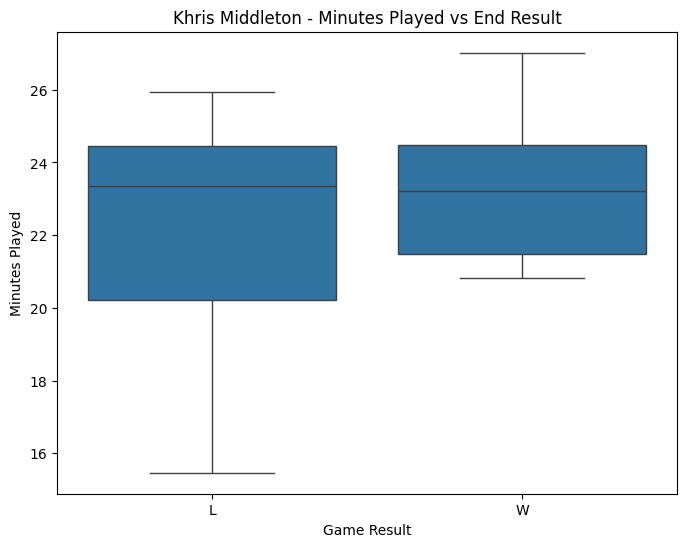

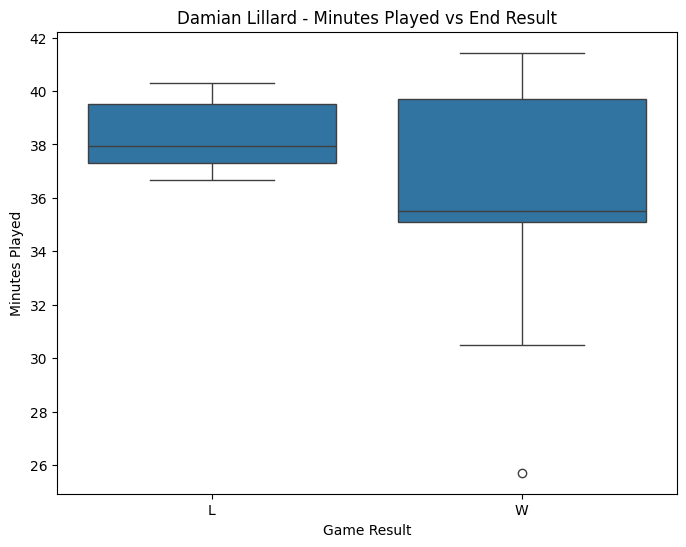

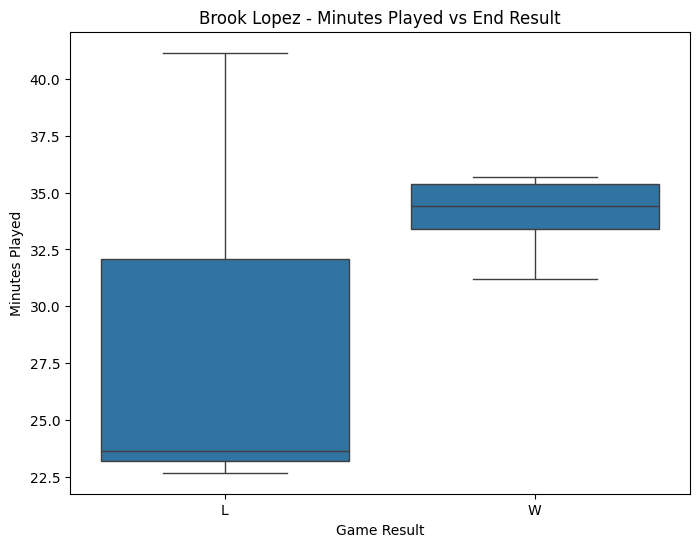

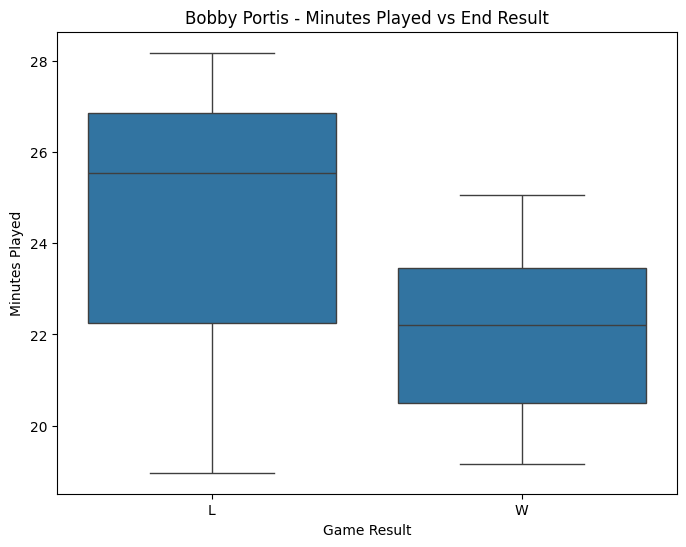

In [27]:
# Boxplot creation: Each player's boxplot will show, how his playing time is distributed
# for each one of the two possible results.
import seaborn as sns

players = ["Giannis Antetokounmpo", "Khris Middleton", "Damian Lillard", "Brook Lopez",
           "Bobby Portis"]

for player in players:
  plt.figure(figsize=(8,6))

  temp=df_clean[df_clean["Starters"] == player]
  sns.boxplot(data=temp, x="Result", y="MP_new")
  plt.title(f"{player} - Minutes Played vs End Result")
  plt.xlabel("Game Result")
  plt.ylabel("Minutes Played")
  plt.show()

**Although many people would think that team leaders' minutes like Giannis and Lillard would have a significant impact in the end result, it is pretty obvious that, during the month of January, Bucks won while Brook Lopez played approximately 35 minutes.**

**When his average time was at 24 minutes the bucks had a difficult time securing the W.**

**The fact that some star or key players of this team appear to have fewer minutes of playing time on team's wins, is due to protecting them during the final minutes of the game and put them on the bench when the score difference can not change.**

**2. How is players' plus/minus formed between the two types of results?**

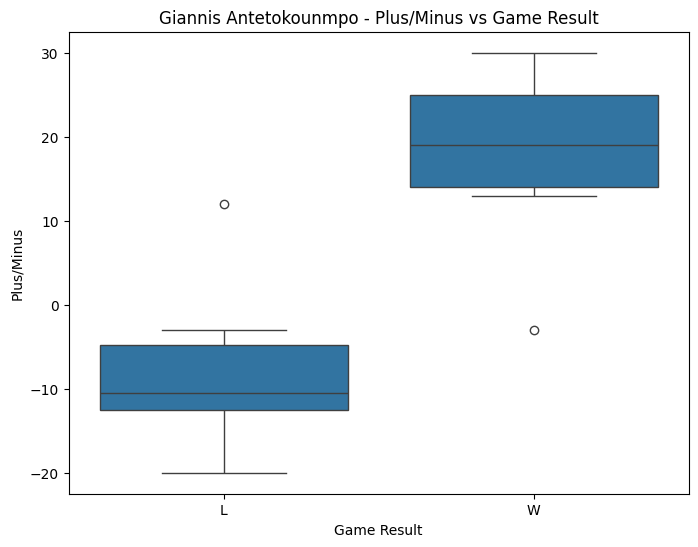

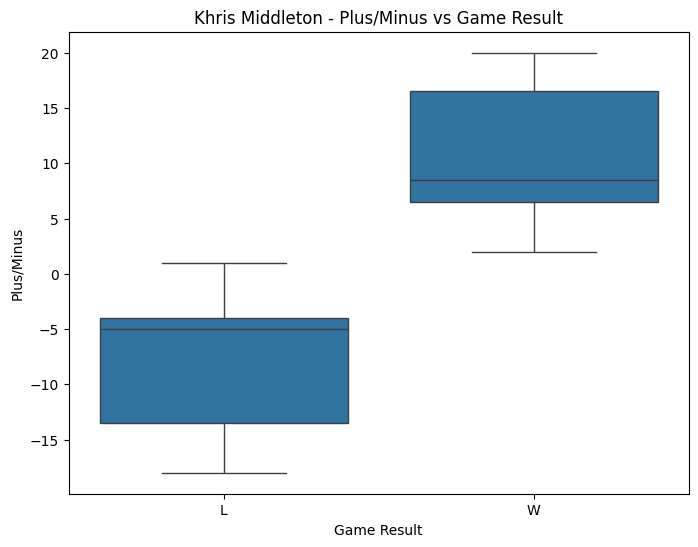

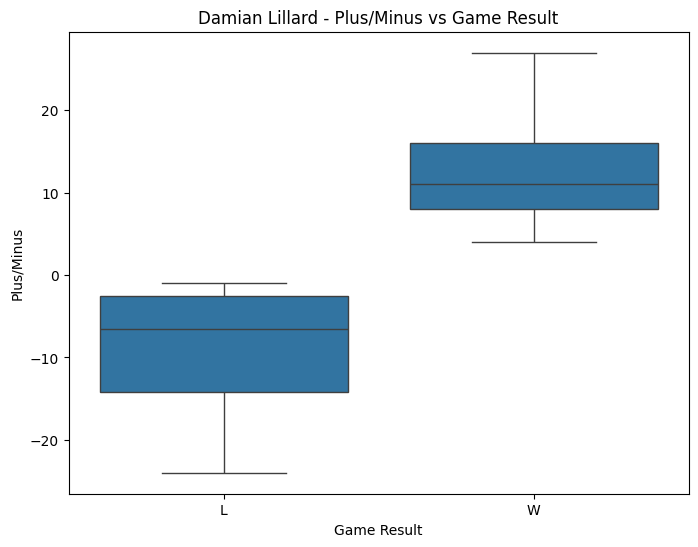

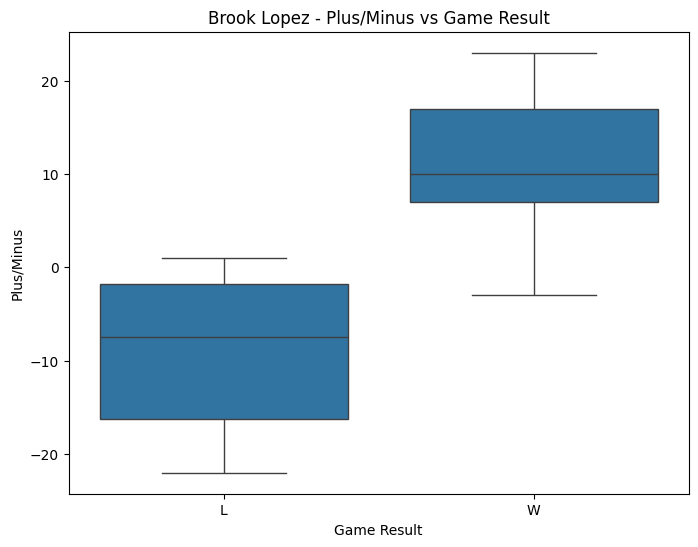

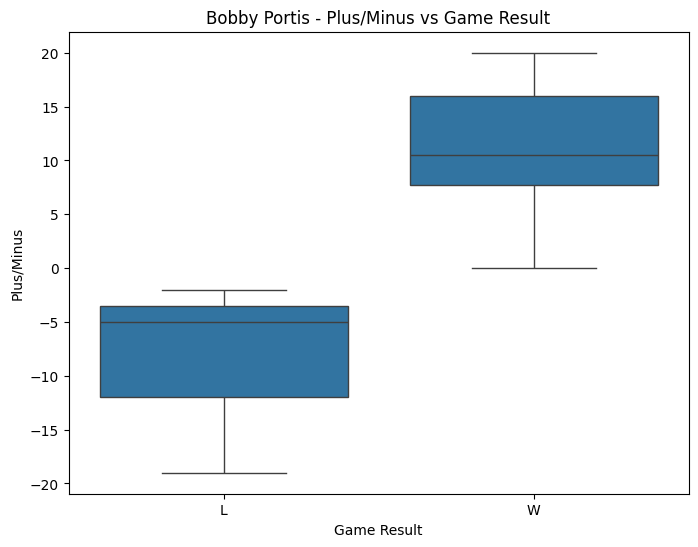

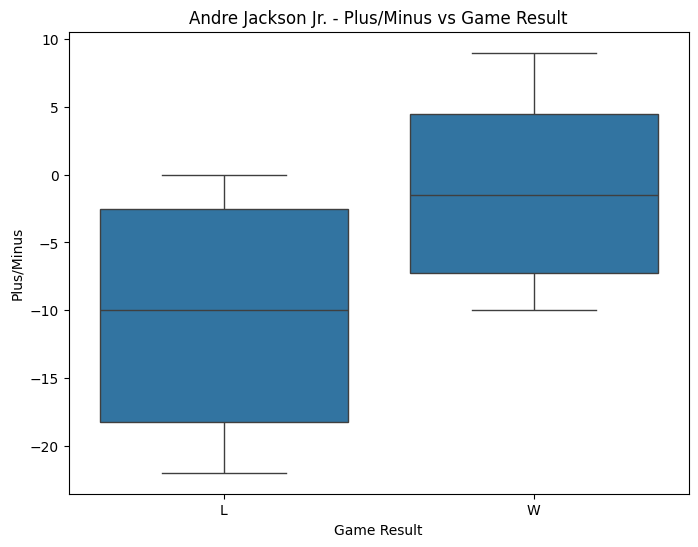

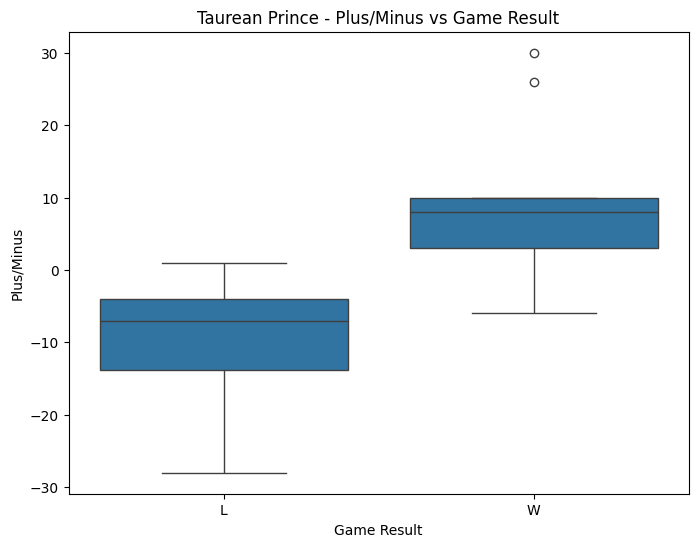

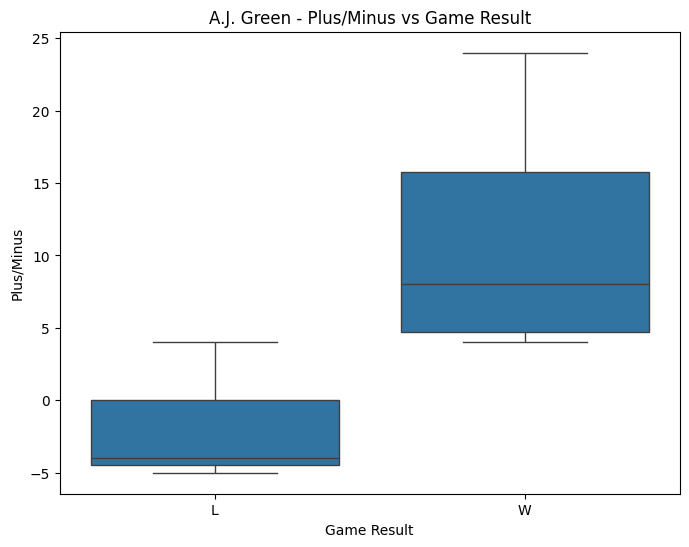

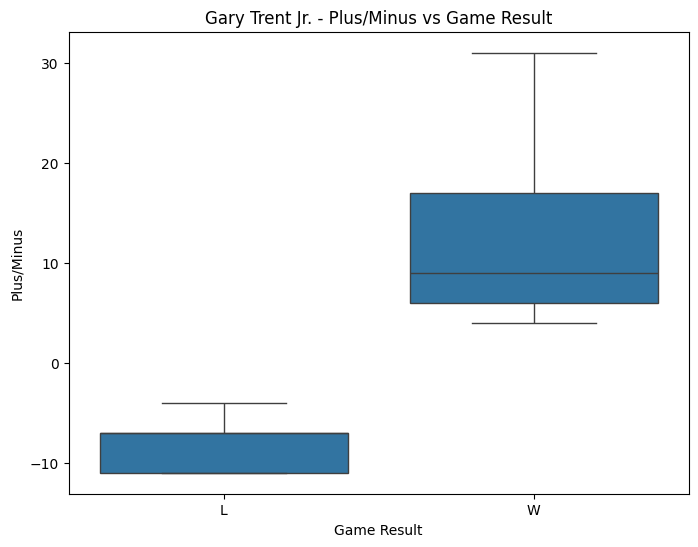

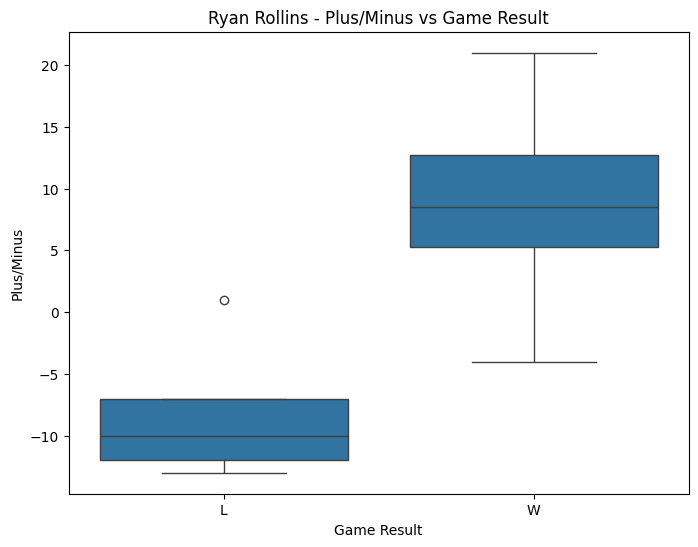

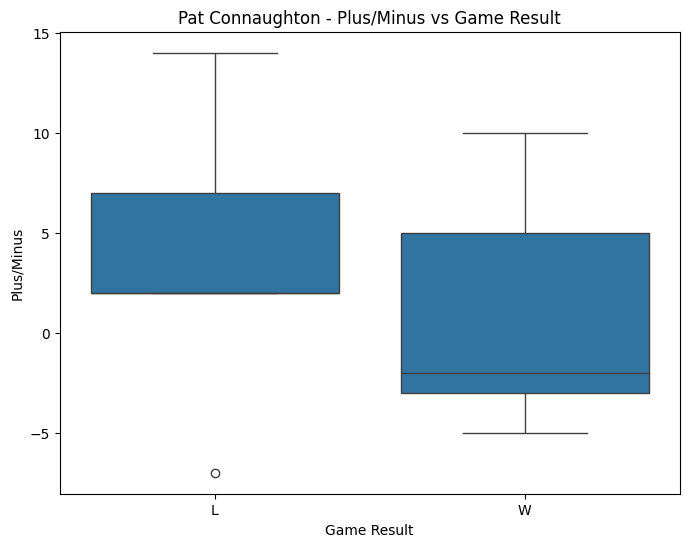

In [30]:
# New Boxplots creation: For every player on the team, the boxplot will show his plus/minus stat distribution,
# between the two kinds of results.

players = ["Giannis Antetokounmpo", "Khris Middleton", "Damian Lillard", "Brook Lopez",
           "Bobby Portis", "Andre Jackson Jr.", "Taurean Prince", "A.J. Green",
           "Gary Trent Jr.", "Ryan Rollins", "Pat Connaughton"]

for player in players:
  plt.figure(figsize=(8,6))

  temp = df_clean[df_clean["Starters"] == player]
  sns.boxplot(data=temp, x="Result", y="+/-")

  plt.title(f"{player} - Plus/Minus vs Game Result")
  plt.xlabel("Game Result")
  plt.ylabel("Plus/Minus")
  plt.show()

**As we can see, team's players like Giannis (highest median difference between results), Lillard, Middleton and Lopez have a mainly negative range of +/- when losing. This highlights how much the Bucks' game is affected by these 4 starters.**

**I want to focus on Giannis more, because he has the biggest difference comparing the medians of the two results and one of the lowest median +/-, when his team loses. Why is that happening?**

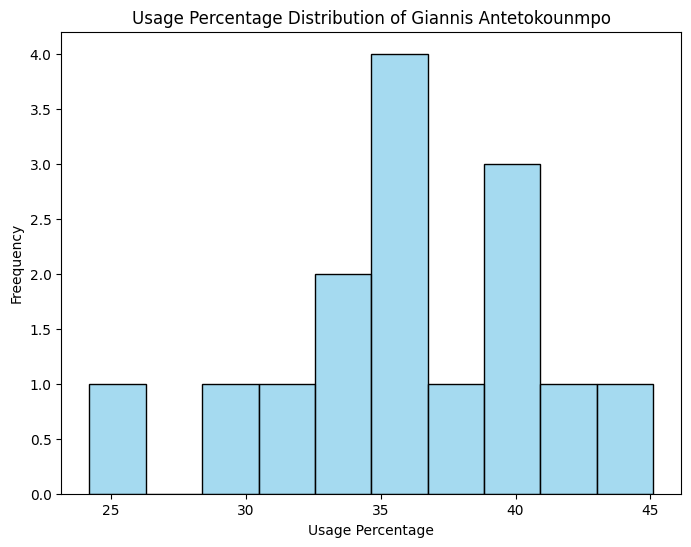

In [31]:
# histogram creation for usage percent of Giannis
plt.figure(figsize=(8,6))

temp_df = df_clean[df_clean["Starters"] == "Giannis Antetokounmpo"]
sns.histplot(temp_df["USG%"].dropna(), bins=10, color="skyblue", edgecolor="black")

plt.title("Usage Percentage Distribution of Giannis Antetokounmpo")
plt.xlabel("Usage Percentage")
plt.ylabel("Freequency")
plt.show()

**As it appears on the histogram, Giannis is an important part of approximately 30-40% of Bucks plays. This means that, when he has a bad game, the team struggles more to win the game, as he is an important part of Bucks' offense.**